In [1]:
# baseline model with dropout on the cifar10 dataset
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

[-10.          -9.97997998  -9.95995996  -9.93993994  -9.91991992]


(-5.0, 5.0, -2.0, 2.0)

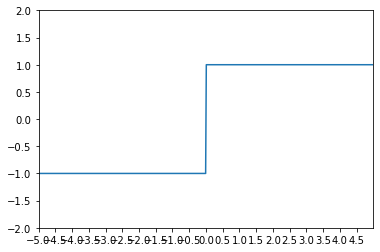

In [2]:
def activation_function(x):
    """
    Step function to respond with y = 1 or -1
    Parameter:
    x: An x (numeric) value that will have a corresponding y value of 1 or -1
    """
    if x < 0:
        return -1
    else:
        return 1
    
rnge = np.linspace(-10.0, 10.0, num=1000)
print(rnge[0:5])
values = [activation_function(i) for i in rnge]
plt.plot(rnge, values)
plt.xticks(np.arange(-5, 5, 0.5))
plt.axis([-5, 5, -2, 2])

In [3]:
def perceptron(inp, weights):
    output = activation_function(np.dot(inp, weights))
    return output

perceptron([1, 2, 3, 4, 5], [1, 1, 2, 1, 1])

1

,weight,height,type
0,233.479920,23.514130,rat
1,231.324467,26.033830,rat
2,17.906954,6.846577,mouse
3,230.276523,24.077800,rat
4,20.360593,6.605983,mouse
...,...,...,...
244,20.614362,6.575722,mouse
245,22.249846,6.951267,mouse
246,228.568162,27.146987,rat
247,229.002922,23.526073,rat


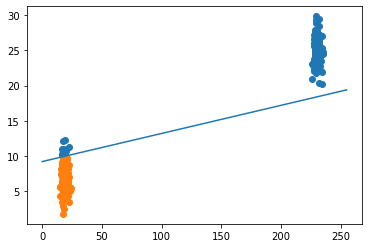

In [4]:
rodents_data = pd.read_csv('../data/rodents.csv', delimiter=';', dtype={'weight': float, 'height': float})
rodents_data = rodents_data.dropna()
for label in rodents_data.type.unique():
    data = rodents_data[rodents_data['type'] == label]
    plt.scatter(data['weight'], data['height'])
    
x = np.linspace(0,rodents_data.weight.max() + 20,10)
y = 0.04*x+9.2
plt.plot(x,y)


rodents_data

In [5]:


# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dropout(0.2))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()



In [6]:
def define_model1():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [7]:
def define_model2():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [12]:

def define_model3():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(MaxPooling2D((2, 2)))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

In [9]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model1()
	# fit model
	history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=1)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

Epoch 1/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.9113 - accuracy: 0.3113 - val_loss: 1.4278 - val_accuracy: 0.4954
Epoch 2/10
1563/1563 [==============================] - 35s 22ms/step - loss: 1.3655 - accuracy: 0.5112 - val_loss: 1.2569 - val_accuracy: 0.5524
Epoch 3/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.1642 - accuracy: 0.5887 - val_loss: 1.1074 - val_accuracy: 0.6104
Epoch 4/10
1563/1563 [==============================] - 34s 22ms/step - loss: 1.0358 - accuracy: 0.6336 - val_loss: 1.0618 - val_accuracy: 0.6221
Epoch 5/10
1563/1563 [==============================] - 34s 22ms/step - loss: 0.9363 - accuracy: 0.6710 - val_loss: 0.9985 - val_accuracy: 0.6487
Epoch 6/10
1563/1563 [==============================] - 35s 23ms/step - loss: 0.8470 - accuracy: 0.7073 - val_loss: 0.9648 - val_accuracy: 0.6638
Epoch 7/10
1563/1563 [==============================] - 37s 24ms/step - loss: 0.7842 - accuracy: 0.7256 - val_loss: 0.9526 -

In [10]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model2()
	# fit model
	history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=1)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

Epoch 1/10
1563/1563 [==============================] - 57s 36ms/step - loss: 1.8644 - accuracy: 0.3210 - val_loss: 1.3413 - val_accuracy: 0.5132
Epoch 2/10
1563/1563 [==============================] - 55s 35ms/step - loss: 1.2980 - accuracy: 0.5378 - val_loss: 1.1498 - val_accuracy: 0.5908
Epoch 3/10
1563/1563 [==============================] - 58s 37ms/step - loss: 1.0823 - accuracy: 0.6197 - val_loss: 1.0548 - val_accuracy: 0.6262
Epoch 4/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.9460 - accuracy: 0.6707 - val_loss: 0.9633 - val_accuracy: 0.6657
Epoch 5/10
1563/1563 [==============================] - 57s 36ms/step - loss: 0.8464 - accuracy: 0.7037 - val_loss: 0.9374 - val_accuracy: 0.6755
Epoch 6/10
1563/1563 [==============================] - 53s 34ms/step - loss: 0.7575 - accuracy: 0.7384 - val_loss: 0.9417 - val_accuracy: 0.6782
Epoch 7/10
1563/1563 [==============================] - 55s 35ms/step - loss: 0.6870 - accuracy: 0.7600 - val_loss: 0.8803 -

In [13]:
# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model3()
	# fit model
	history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=1)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)

# entry point, run the test harness
run_test_harness()

Epoch 1/10
1563/1563 [==============================] - 70s 45ms/step - loss: 1.9447 - accuracy: 0.2933 - val_loss: 1.3731 - val_accuracy: 0.5091
Epoch 2/10
1563/1563 [==============================] - 72s 46ms/step - loss: 1.3160 - accuracy: 0.5323 - val_loss: 1.1365 - val_accuracy: 0.5988
Epoch 3/10
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0768 - accuracy: 0.6197 - val_loss: 1.0717 - val_accuracy: 0.6172
Epoch 4/10
1563/1563 [==============================] - 73s 47ms/step - loss: 0.9344 - accuracy: 0.6724 - val_loss: 0.9497 - val_accuracy: 0.6679
Epoch 5/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.8169 - accuracy: 0.7158 - val_loss: 0.8821 - val_accuracy: 0.6974
Epoch 6/10
1563/1563 [==============================] - 78s 50ms/step - loss: 0.7169 - accuracy: 0.7517 - val_loss: 0.8669 - val_accuracy: 0.7001
Epoch 7/10
1563/1563 [==============================] - 77s 49ms/step - loss: 0.6284 - accuracy: 0.7814 - val_loss: 0.8871 -

In [ ]:
# baseline model with dropout and data augmentation on the cifar10 dataset
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dropout
from keras.layers import BatchNormalization
import h5py

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# define cnn model
def define_model():
	model = Sequential()
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
	model.add(BatchNormalization())
	model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.2))
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.3))
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
	model.add(BatchNormalization())
	model.add(MaxPooling2D((2, 2)))
	model.add(Dropout(0.4))
	model.add(Flatten())
	model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
	model.add(BatchNormalization())
	model.add(Dropout(0.5))
	model.add(Dense(10, activation='softmax'))
	# compile model
	opt = SGD(lr=0.001, momentum=0.9)
	model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
	return model

# plot diagnostic learning curves
def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
	# save plot to file
	filename = sys.argv[0].split('/')[-1]
	pyplot.savefig(filename + '_plot.png')
	pyplot.close()

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# define model
	model = define_model()
	# create data generator
	datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
	# prepare iterator
	it_train = datagen.flow(trainX, trainY, batch_size=64)
	# fit model
	steps = int(trainX.shape[0] / 64)
	history = model.fit_generator(it_train, steps_per_epoch=steps, epochs=400, validation_data=(testX, testY), verbose=1)
	# evaluate model
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))
	# learning curves
	summarize_diagnostics(history)
	model.save('final_model.h5')

# entry point, run the test harness
run_test_harness()

Epoch 1/400
781/781 [==============================] - 92s 116ms/step - loss: 2.4929 - accuracy: 0.2453 - val_loss: 1.4496 - val_accuracy: 0.4752
Epoch 2/400
781/781 [==============================] - 89s 114ms/step - loss: 1.6660 - accuracy: 0.3926 - val_loss: 1.3753 - val_accuracy: 0.5008
Epoch 3/400
781/781 [==============================] - 92s 117ms/step - loss: 1.5090 - accuracy: 0.4493 - val_loss: 1.3718 - val_accuracy: 0.5058
Epoch 4/400
781/781 [==============================] - 90s 115ms/step - loss: 1.4223 - accuracy: 0.4860 - val_loss: 1.3494 - val_accuracy: 0.4998
Epoch 5/400
781/781 [==============================] - 87s 112ms/step - loss: 1.3509 - accuracy: 0.5115 - val_loss: 1.2384 - val_accuracy: 0.5554
Epoch 6/400
781/781 [==============================] - 84s 107ms/step - loss: 1.2988 - accuracy: 0.5309 - val_loss: 1.2739 - val_accuracy: 0.5405
Epoch 7/400
781/781 [==============================] - 97s 124ms/step - loss: 1.2465 - accuracy: 0.5519 - val_loss: 1.1591 -

Epoch 57/400
781/781 [==============================] - 87s 111ms/step - loss: 0.6756 - accuracy: 0.7655 - val_loss: 0.5910 - val_accuracy: 0.7940
Epoch 58/400
781/781 [==============================] - 87s 111ms/step - loss: 0.6681 - accuracy: 0.7682 - val_loss: 0.5941 - val_accuracy: 0.7968
Epoch 59/400
781/781 [==============================] - 86s 110ms/step - loss: 0.6432 - accuracy: 0.7817 - val_loss: 0.5745 - val_accuracy: 0.8035
Epoch 60/400
781/781 [==============================] - 86s 111ms/step - loss: 0.6474 - accuracy: 0.7783 - val_loss: 0.6129 - val_accuracy: 0.7883
Epoch 61/400
781/781 [==============================] - 87s 112ms/step - loss: 0.6446 - accuracy: 0.7786 - val_loss: 0.5682 - val_accuracy: 0.8048
Epoch 62/400
781/781 [==============================] - 85s 109ms/step - loss: 0.6390 - accuracy: 0.7771 - val_loss: 0.6313 - val_accuracy: 0.7851
Epoch 63/400
781/781 [==============================] - 87s 112ms/step - loss: 0.6418 - accuracy: 0.7759 - val_loss: 0

In [ ]:
# evaluate the deep model on the test dataset
from keras.datasets import cifar10
from keras.models import load_model
from keras.utils import to_categorical

# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

# run the test harness for evaluating a model
def run_test_harness():
	# load dataset
	trainX, trainY, testX, testY = load_dataset()
	# prepare pixel data
	trainX, testX = prep_pixels(trainX, testX)
	# load model
	model = load_model('final_model.h5')
	# evaluate model on test dataset
	_, acc = model.evaluate(testX, testY, verbose=0)
	print('> %.3f' % (acc * 100.0))

# entry point, run the test harness
run_test_harness()